In [4]:
import os
HOME = os.getcwd()
print(HOME)

f:\Projects\IIT\edge-ai\cw\EdgeAI-Group26\model


In [5]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Nov_30_19:15:10_Pacific_Standard_Time_2020
Cuda compilation tools, release 11.2, V11.2.67
Build cuda_11.2.r11.2/compiler.29373293_0


In [6]:
import torch

if torch.cuda.is_available():
    print("GPU is available")
else:
    print("GPU is not available")

GPU is not available


In [4]:
import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display

display.clear_output()

ultralytics.checks()

Ultralytics 8.3.107  Python-3.10.11 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Setup complete  (8 CPUs, 11.9 GB RAM, 141.5/311.9 GB disk)


In [5]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load Model

In [7]:
model = YOLO("yolov8n.pt")

## Make Detections

In [8]:
img = './tests/test-images/2.jpg'
results = model.predict(source=img, save=True)

print(results[0].orig_shape)
output_image = results[0].orig_img
output_image_dir = results[0].save_dir
input_image_path = results[0].path
print(output_image_dir)
print(input_image_path)


image 1/1 f:\Projects\IIT\edge-ai\cw\EdgeAI-Group26\model\tests\test-images\2.jpg: 480x640 4 persons, 1 cup, 2 chairs, 1 dining table, 1 laptop, 61.8ms
Speed: 194.7ms preprocess, 61.8ms inference, 1826.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict4
(1440, 1920)
runs\detect\predict4
f:\Projects\IIT\edge-ai\cw\EdgeAI-Group26\model\tests\test-images\2.jpg


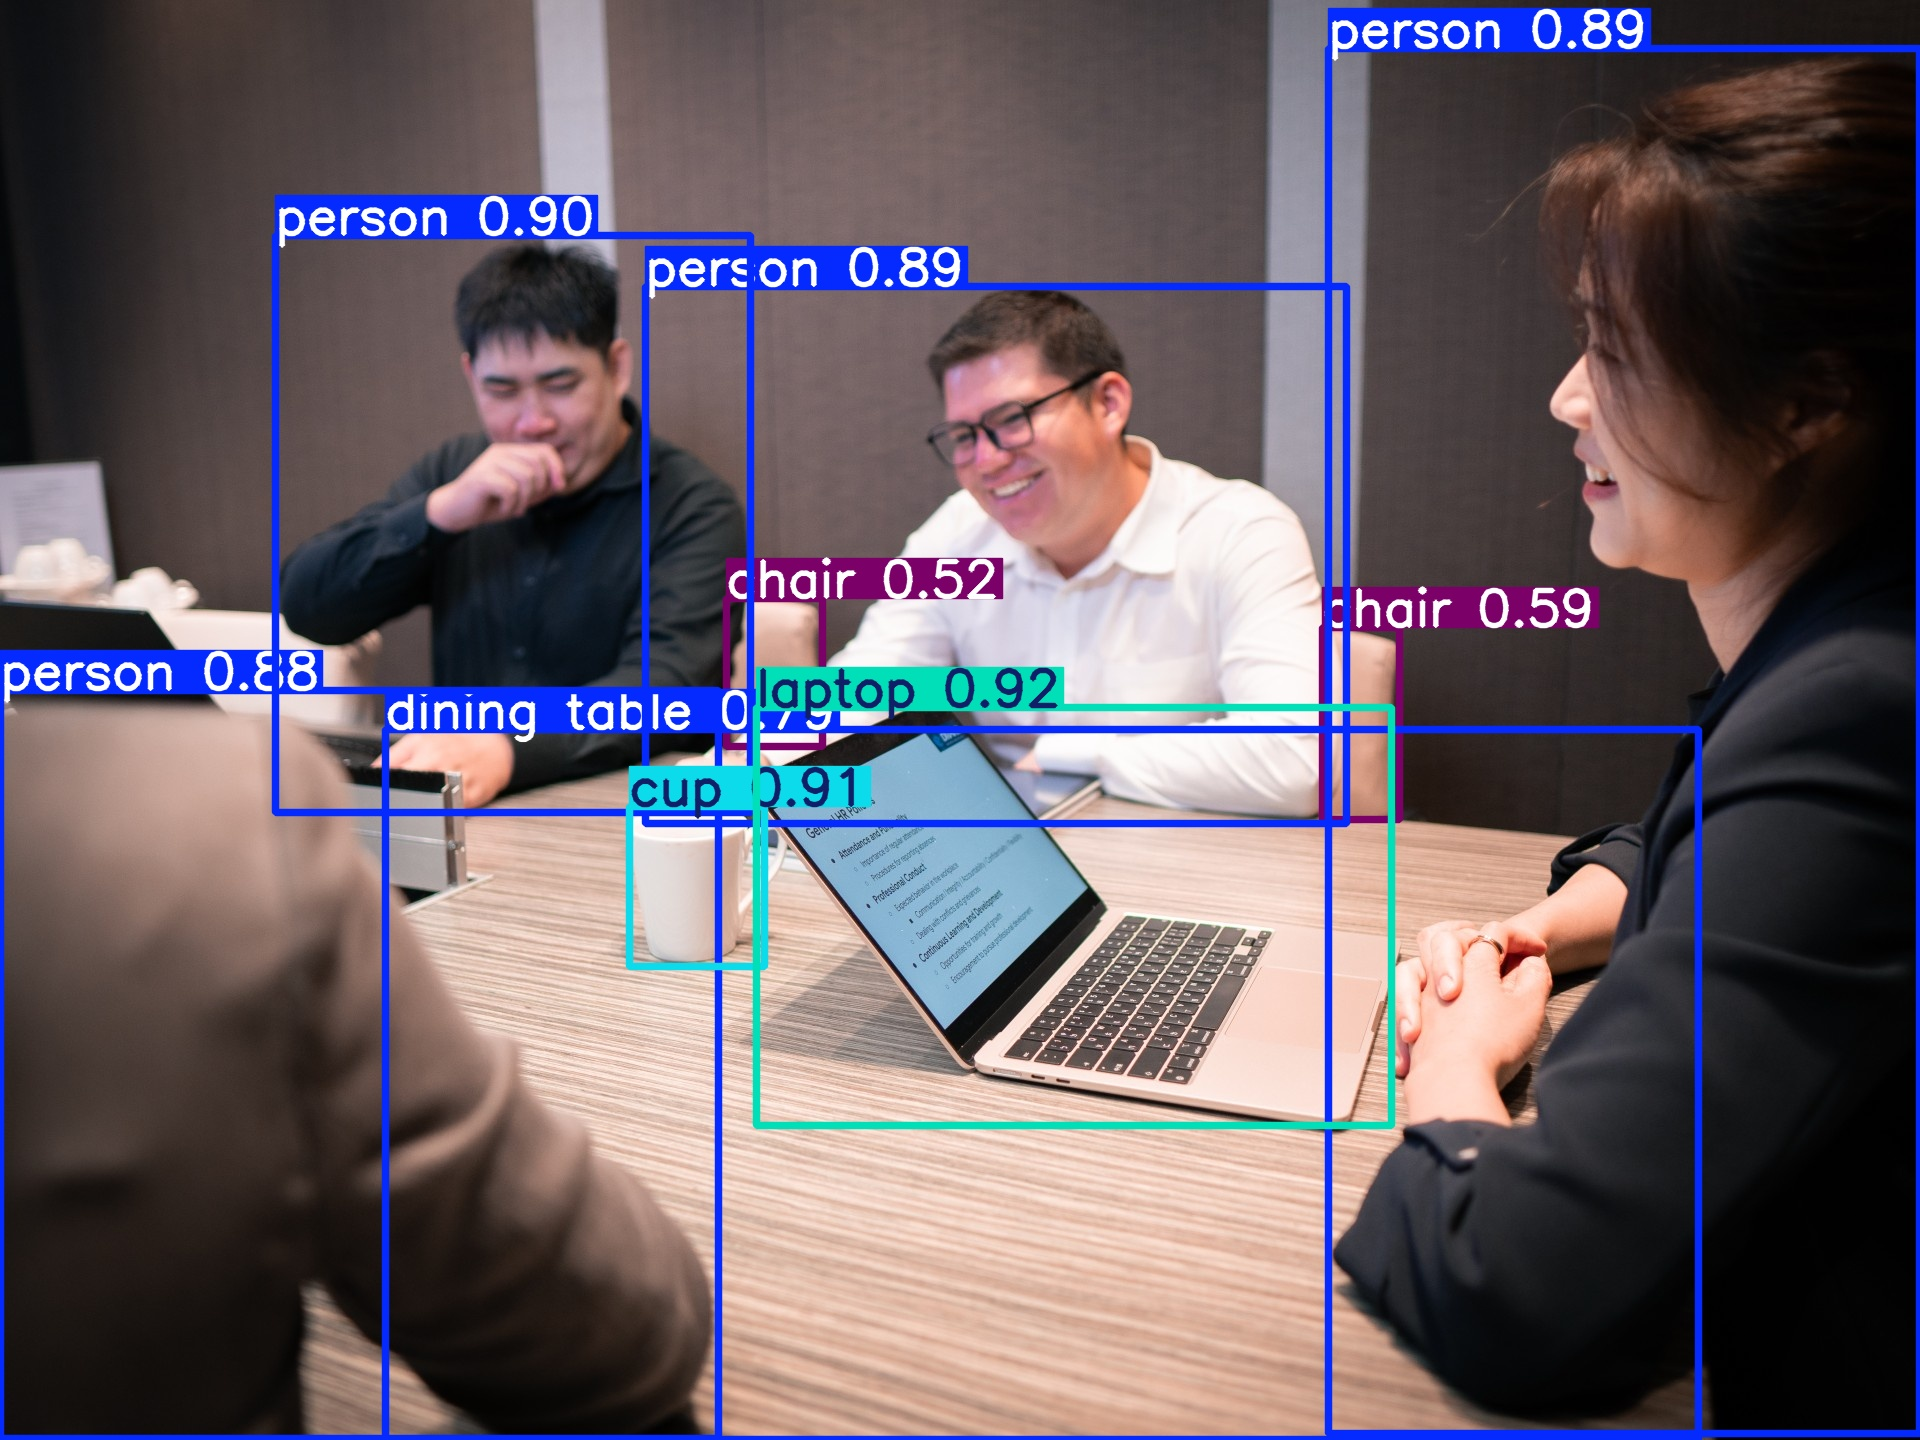

In [9]:
Image(
    filename=f'{HOME}/{output_image_dir}/{os.path.basename(input_image_path)}', width=200)

In [10]:
def list_available_cameras(max_devices=10):
    available = []
    for device in range(max_devices):
        cap = cv2.VideoCapture(device)
        if cap is not None and cap.isOpened():
            available.append(device)
            cap.release()
    return available

In [11]:
devices = list_available_cameras()
print("Available camera device indices:", devices)

Available camera device indices: [0]


In [11]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Perform object detection
        results = model(frame)

        # Annotate the frame with detection results
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Detection", annotated_frame)

        # Exit loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
except KeyboardInterrupt:
    print("Interrupted by user.")
finally:
    # Release resources
    cap.release()
    cv2.destroyAllWindows()


0: 480x640 (no detections), 12.8ms
Speed: 2.3ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 12.2ms
Speed: 2.5ms preprocess, 12.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.7ms
Speed: 2.7ms preprocess, 11.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 16.0ms
Speed: 2.2ms preprocess, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.8ms
Speed: 1.7ms preprocess, 11.8ms i

# Load dataset

In [14]:
import os
import zipfile
import requests

# Define download URL and target paths
url = "https://universe.roboflow.com/ds/fHfAQH8rN9?key=qg6w5QdWmk"
download_dir = "dataset-2"
zip_path = os.path.join(download_dir, "roboflow.zip")

os.makedirs(download_dir, exist_ok=True)

print("Downloading dataset...")
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(zip_path, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)
print("Download complete.")

print("Extracting files...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(download_dir)
print("Extraction complete.")

# Clean up
os.remove(zip_path)
print("Clean up complete. Dataset ready at:", download_dir)

Download complete.
Extracting files...
Extraction complete.
Clean up complete. Dataset ready at: dataset-2


# Fine tune model

In [11]:
import yaml

train_dir = os.path.join(
    os.getcwd(), 'Drowsiness-Detection-2', 'train')
val_dir = os.path.join(
    os.getcwd(), 'Drowsiness-Detection-2', 'val')
testl_dir = os.path.join(
    os.getcwd(), 'Drowsiness-Detection-2', 'test')

class_names = ["Awake", "Drowsy"]

yaml_content = {
    'names ': '',

    'nc': len(class_names),
    'train': train_dir,
    'val': val_dir,
}

yaml_file = 'dataset_custom.yaml'
with open(yaml_file, 'w') as yaml_out:
    yaml.dump(yaml_content, yaml_out, default_flow_style=False)
print(f'Custom YAML file created: {yaml_file}')

Custom YAML file created: dataset_custom.yaml


In [8]:


results = model.train(
    data='dataset-2/data.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    val=True,
    save=True,
    device=0,
    cache=True,
    plots=True,
    exist_ok=True,
    patience=5,            
    workers=2              
)

New https://pypi.org/project/ultralytics/8.3.111 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.107  Python-3.10.11 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset-2/data.yaml, epochs=50, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=2, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

train: Scanning F:\Projects\IIT\edge-ai\cw\EdgeAI-Group26\model\dataset-2\train\labels.cache... 2080 images, 11 backgrounds, 0 corrupt: 100%|██████████| 2080/2080 [00:00<?, ?it/s]


WARNING  cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.9GB RAM): 100%|██████████| 2080/2080 [00:10<00:00, 204.36it/s]
val: Scanning F:\Projects\IIT\edge-ai\cw\EdgeAI-Group26\model\dataset-2\valid\labels.cache... 617 images, 0 backgrounds, 0 corrupt: 100%|██████████| 617/617 [00:00<?, ?it/s]


WARNING  cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.6GB RAM): 100%|██████████| 617/617 [00:02<00:00, 256.07it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.06G     0.6792      1.508      1.037         14        640: 100%|██████████| 260/260 [00:43<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.46it/s]


                   all        617        617      0.548      0.806      0.617      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.33G     0.5863     0.9328     0.9524         14        640: 100%|██████████| 260/260 [00:32<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  7.82it/s]


                   all        617        617      0.608      0.722      0.667      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.34G     0.5693     0.7469     0.9411         22        640: 100%|██████████| 260/260 [00:32<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  7.86it/s]

                   all        617        617      0.635      0.704      0.735      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.36G      0.546     0.6328     0.9374         15        640: 100%|██████████| 260/260 [00:32<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.43it/s]

                   all        617        617      0.727       0.79      0.836       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.37G     0.5116      0.548     0.9251         22        640: 100%|██████████| 260/260 [00:34<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.62it/s]

                   all        617        617      0.709      0.754      0.795      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.39G     0.5211     0.5102     0.9298         13        640: 100%|██████████| 260/260 [00:38<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.31it/s]

                   all        617        617      0.794      0.827      0.869       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.39G     0.4881     0.4934     0.9157         13        640: 100%|██████████| 260/260 [00:38<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.63it/s]

                   all        617        617      0.802      0.817      0.872      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.39G     0.4677     0.4675     0.9073         16        640: 100%|██████████| 260/260 [00:38<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.73it/s]

                   all        617        617      0.781      0.821       0.87      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.39G     0.4585     0.4392     0.9045         22        640: 100%|██████████| 260/260 [00:41<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.56it/s]

                   all        617        617      0.807      0.851      0.902      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.39G     0.4582     0.4301     0.9104         17        640: 100%|██████████| 260/260 [00:39<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.50it/s]

                   all        617        617      0.849      0.818        0.9      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.39G     0.4471     0.4111     0.9029         19        640: 100%|██████████| 260/260 [00:39<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.69it/s]

                   all        617        617      0.836      0.814      0.878       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.41G     0.4326     0.3926      0.896         20        640: 100%|██████████| 260/260 [00:38<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.67it/s]

                   all        617        617      0.888      0.866      0.929       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.42G     0.4241     0.3821     0.8951         11        640: 100%|██████████| 260/260 [00:38<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  5.94it/s]

                   all        617        617      0.903      0.814      0.917      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.44G     0.4285     0.3696     0.8907         11        640: 100%|██████████| 260/260 [00:38<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.71it/s]

                   all        617        617      0.881      0.834      0.929      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.46G     0.4192     0.3668     0.8944         16        640: 100%|██████████| 260/260 [00:38<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.71it/s]

                   all        617        617      0.924       0.86       0.94      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.46G     0.4073     0.3535     0.8895         16        640: 100%|██████████| 260/260 [00:38<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.70it/s]

                   all        617        617       0.91       0.81      0.931      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.46G      0.404     0.3424     0.8901         19        640: 100%|██████████| 260/260 [00:38<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.70it/s]

                   all        617        617      0.902      0.866      0.929       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.46G     0.4085     0.3536     0.8935         21        640: 100%|██████████| 260/260 [00:38<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.75it/s]

                   all        617        617      0.859      0.874      0.932      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.46G     0.3978     0.3332     0.8817         18        640: 100%|██████████| 260/260 [00:38<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.73it/s]

                   all        617        617      0.934      0.855      0.951      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.46G      0.394     0.3474     0.8907         17        640: 100%|██████████| 260/260 [00:38<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.55it/s]

                   all        617        617      0.904      0.886      0.954      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.46G      0.382     0.3268     0.8818         16        640: 100%|██████████| 260/260 [00:37<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.75it/s]

                   all        617        617      0.932      0.841      0.946       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.46G     0.3786     0.3209     0.8802         12        640: 100%|██████████| 260/260 [00:37<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.75it/s]

                   all        617        617      0.934      0.891      0.958      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.46G     0.3804     0.3115       0.88         11        640: 100%|██████████| 260/260 [00:38<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.61it/s]

                   all        617        617      0.957      0.857      0.949      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.46G     0.3737     0.3116     0.8808         19        640: 100%|██████████| 260/260 [00:37<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.74it/s]

                   all        617        617      0.889       0.88      0.948      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.46G     0.3704     0.3098     0.8751         15        640: 100%|██████████| 260/260 [00:38<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.67it/s]

                   all        617        617      0.917      0.913       0.96      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.46G     0.3648     0.2978     0.8751         16        640: 100%|██████████| 260/260 [00:37<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.78it/s]

                   all        617        617      0.948      0.903      0.966      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.46G     0.3702     0.2952     0.8733         18        640: 100%|██████████| 260/260 [00:37<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.68it/s]

                   all        617        617       0.94      0.925      0.972      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.46G     0.3488      0.292     0.8728         16        640: 100%|██████████| 260/260 [00:40<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.61it/s]

                   all        617        617      0.916      0.928      0.968      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.46G      0.353     0.2836      0.869         12        640: 100%|██████████| 260/260 [00:38<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.60it/s]

                   all        617        617      0.885      0.904      0.963       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.46G     0.3587     0.2981     0.8738         13        640: 100%|██████████| 260/260 [00:38<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.79it/s]

                   all        617        617       0.93      0.905      0.968      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.46G     0.3446     0.2808     0.8671         17        640: 100%|██████████| 260/260 [00:37<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.70it/s]

                   all        617        617      0.937       0.92      0.969      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.46G     0.3441     0.2723     0.8668         15        640: 100%|██████████| 260/260 [00:37<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.69it/s]

                   all        617        617      0.904      0.939      0.968      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.46G     0.3374     0.2708     0.8714         13        640: 100%|██████████| 260/260 [00:37<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.65it/s]

                   all        617        617      0.952      0.903      0.968      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.46G     0.3317       0.27     0.8643         15        640: 100%|██████████| 260/260 [00:37<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.66it/s]

                   all        617        617      0.935      0.946      0.978      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.46G     0.3344       0.26     0.8641         26        640: 100%|██████████| 260/260 [00:37<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.85it/s]

                   all        617        617      0.955       0.95      0.976      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.46G     0.3246     0.2544     0.8636         18        640: 100%|██████████| 260/260 [00:37<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.64it/s]

                   all        617        617      0.944      0.937      0.974      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.46G      0.326     0.2525     0.8671         14        640: 100%|██████████| 260/260 [00:37<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.50it/s]

                   all        617        617      0.955      0.952       0.98      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.46G     0.3263     0.2577     0.8644         18        640: 100%|██████████| 260/260 [00:37<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.47it/s]

                   all        617        617      0.947      0.921      0.978      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.46G     0.3154     0.2499     0.8574         12        640: 100%|██████████| 260/260 [00:37<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.78it/s]

                   all        617        617      0.938      0.944      0.979      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.46G      0.316     0.2512      0.862         19        640: 100%|██████████| 260/260 [00:38<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.48it/s]

                   all        617        617      0.961      0.924      0.981      0.867


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.46G     0.6134     0.4402     0.9931          8        640: 100%|██████████| 260/260 [00:42<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.23it/s]

                   all        617        617      0.968      0.952      0.983      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.46G     0.5766     0.3876     0.9674          8        640: 100%|██████████| 260/260 [00:38<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.52it/s]

                   all        617        617      0.972      0.962      0.987      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.46G     0.5627     0.3694     0.9601          8        640: 100%|██████████| 260/260 [00:38<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.48it/s]

                   all        617        617      0.969      0.947      0.985      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.46G     0.5494     0.3647     0.9581          8        640: 100%|██████████| 260/260 [00:38<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  5.68it/s]

                   all        617        617      0.965       0.94      0.982      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.46G     0.5306     0.3529     0.9434          8        640: 100%|██████████| 260/260 [00:41<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.57it/s]

                   all        617        617      0.964      0.966      0.984      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.46G     0.5298     0.3314     0.9421          8        640: 100%|██████████| 260/260 [00:37<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.60it/s]

                   all        617        617      0.966      0.966      0.986      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.46G     0.5115     0.3249     0.9314          8        640: 100%|██████████| 260/260 [00:37<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.44it/s]

                   all        617        617      0.971      0.966      0.986       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.46G     0.5027     0.3095     0.9276          8        640: 100%|██████████| 260/260 [00:37<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.72it/s]

                   all        617        617      0.971      0.971      0.988      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.46G     0.4954     0.3121      0.919          8        640: 100%|██████████| 260/260 [00:36<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.66it/s]

                   all        617        617      0.974      0.974      0.989      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.46G     0.4845     0.3014      0.918          8        640: 100%|██████████| 260/260 [00:36<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.74it/s]

                   all        617        617      0.975      0.968      0.988      0.896



50 epochs completed in 0.648 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.107  Python-3.10.11 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.10it/s]


                   all        617        617      0.974      0.974      0.989      0.897
                 awake        327        327      0.982      0.969      0.992       0.91
                drowsy        290        290      0.966      0.979      0.987      0.884
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs\detect\train


# Test the fine tuned model

In [6]:
model = YOLO("runs/detect/train/weights/last.pt")

In [10]:
cap = cv2.VideoCapture("http://192.168.1.54:8080/video")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    annotated_frame = results[0].plot()

    cv2.imshow("YOLOv8", annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 1 awake, 37.9ms
Speed: 17.1ms preprocess, 37.9ms inference, 30.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 drowsy, 18.8ms
Speed: 2.6ms preprocess, 18.8ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 23.1ms
Speed: 1.8ms preprocess, 23.1ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 14.8ms
Speed: 1.5ms preprocess, 14.8ms inference, 4.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 8.7ms
Speed: 2.1ms preprocess, 8.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 2.2ms postprocess per image at shape 

In [11]:
img = 'Drowsiness-Detection-2/valid/images/GOPR0492_MP4-23_jpg.rf.bc9d5b79a38fefe6c7fd8088cef1246f.jpg'
results = model.predict(source=img, save=True)

print(results[0].orig_shape)
output_image = results[0].orig_img
output_image_dir = results[0].save_dir
input_image_path = results[0].path
print(output_image_dir)
print(input_image_path)


image 1/1 f:\Projects\IIT\edge-ai\cw\EdgeAI-Group26\model\Drowsiness-Detection-2\valid\images\GOPR0492_MP4-23_jpg.rf.bc9d5b79a38fefe6c7fd8088cef1246f.jpg: 640x640 (no detections), 10.1ms
Speed: 5.2ms preprocess, 10.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
(416, 416)
runs\detect\predict
f:\Projects\IIT\edge-ai\cw\EdgeAI-Group26\model\Drowsiness-Detection-2\valid\images\GOPR0492_MP4-23_jpg.rf.bc9d5b79a38fefe6c7fd8088cef1246f.jpg


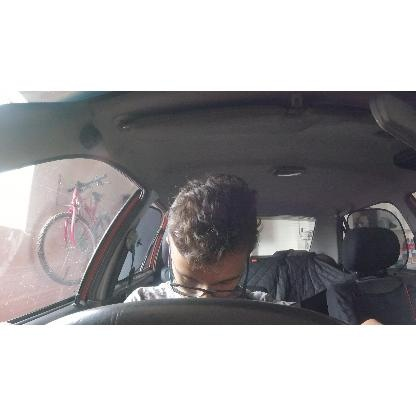

In [12]:
Image(
    filename=f'{HOME}/{output_image_dir}/{os.path.basename(input_image_path)}', width=200)

## Convert to ONNX

In [10]:
model.export(format="onnx", opset=12, dynamic=False, simplify=True)


Ultralytics 8.3.107  Python-3.10.11 torch-2.6.0+cu118 CPU (Intel Core(TM) i3-10100F 3.60GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train\weights\last.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)

ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success  1.3s, saved as 'runs\detect\train\weights\last.onnx' (11.7 MB)

Export complete (1.6s)
Results saved to F:\Projects\IIT\edge-ai\cw\EdgeAI-Group26\model\runs\detect\train\weights
Predict:         yolo predict task=detect model=runs\detect\train\weights\last.onnx imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train\weights\last.onnx imgsz=640 data=dataset-2/data.yaml  
Visualize:       https://netron.app


'runs\\detect\\train\\weights\\last.onnx'

In [15]:
!yolo export model=runs/detect/train/weights/last.pt format=tflite imgsz=640

Ultralytics 8.3.107 🚀 Python-3.10.11 torch-2.6.0+cu118 CPU (Intel Core(TM) i3-10100F 3.60GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train\weights\last.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)


# Model Evaluation

In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO("../finetuned-models/yolov8n.pt")

In [3]:
model.val()

Ultralytics 8.3.111  Python-3.10.11 torch-2.6.0+cpu CPU (Intel Core(TM) i3-10100F 3.60GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.20.0 ms, read: 33.539.5 MB/s, size: 421.5 KB)


val: Scanning F:\Projects\IIT\edge-ai\cw\EdgeAI-Group26\model\dataset-2\valid\labels.cache... 617 images, 0 backgrounds, 0 corrupt: 100%|██████████| 617/617 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [01:15<00:00,  1.94s/it]


                   all        617        617      0.975      0.968      0.988      0.895
                 awake        327        327      0.988      0.968      0.991      0.912
                drowsy        290        290      0.962      0.968      0.986      0.879
Speed: 1.7ms preprocess, 99.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\val3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000205E35B3280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0